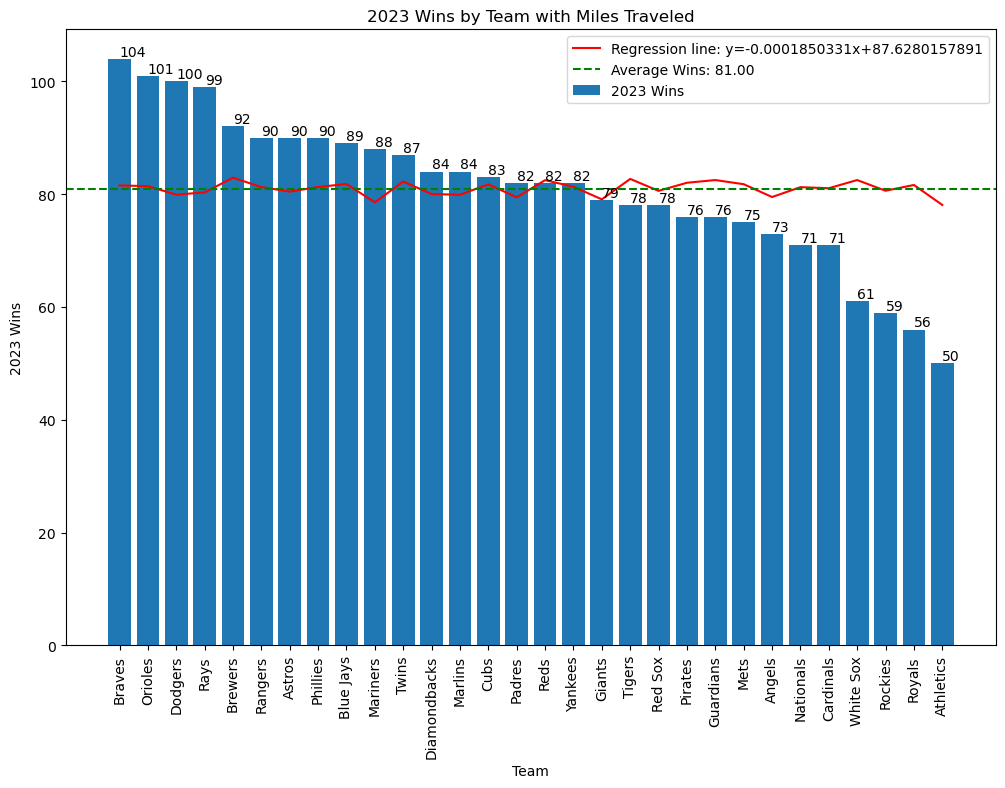

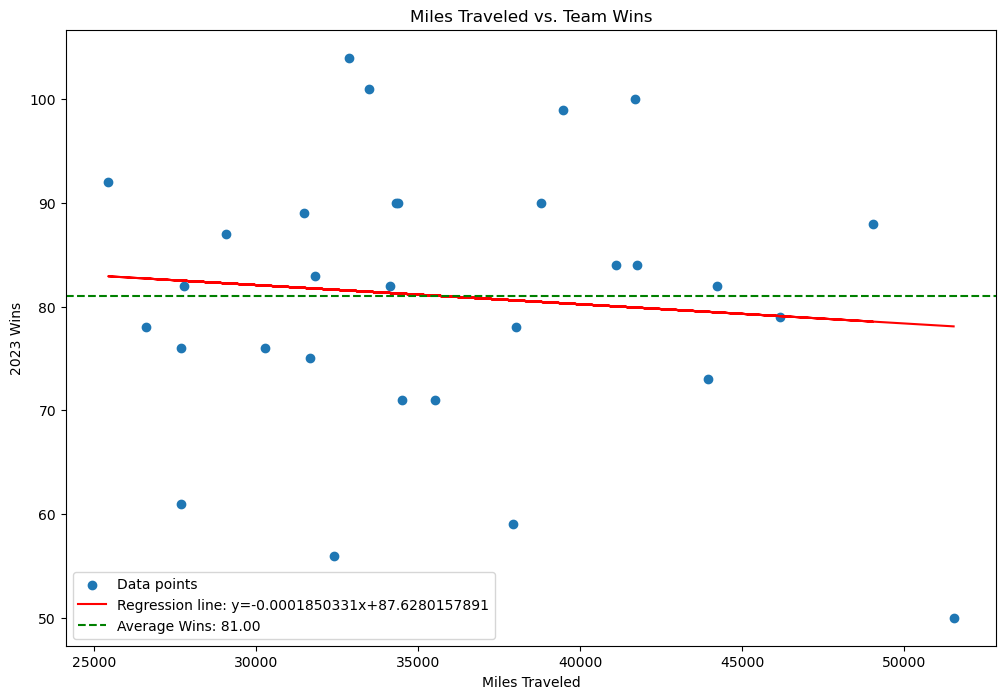

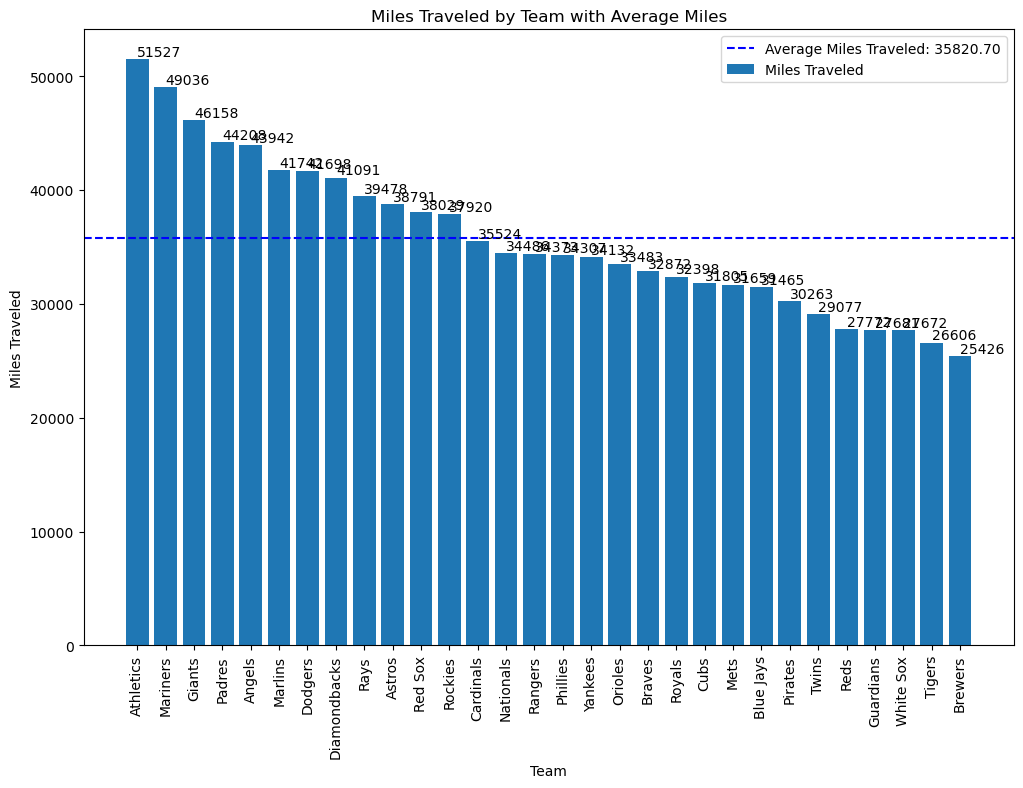

Slope: -0.0001850331
Intercept: 87.6280157891
R-squared: 0.0092381693
P-value: 0.6133842363
T-statistic: -0.5109605141
Z-score: -0.5109605141
Average Team Wins: 81.0000000000
Average Miles Traveled: 35820.7000000000


{'Slope': -0.00018503311741823939,
 'Intercept': 87.62801578910353,
 'R-squared': 0.00923816927605009,
 'P-value': 0.6133842363141174,
 'T-statistic': -0.5109605140718213,
 'Z-score': -0.5109605140718213,
 'Average Team Wins': 81.0,
 'Average Miles Traveled': 35820.7}

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Load the Excel file
file_path = '2023milesmlb.xlsx'
data = pd.read_excel(file_path)

# Data preparation
data_sorted_by_wins = data.sort_values(by='2023 Wins', ascending=False)
data_sorted_by_miles = data.sort_values(by='Miles Traveled', ascending=False)

# Linear regression
miles = data_sorted_by_wins['Miles Traveled']
wins = data_sorted_by_wins['2023 Wins']
slope, intercept, r_value, p_value, std_err = stats.linregress(miles, wins)
regression_line = slope * miles + intercept
average_wins = wins.mean()
average_miles = miles.mean()

# Plotting bar chart (sorted by team wins)
plt.figure(figsize=(12, 8))
bars = plt.bar(data_sorted_by_wins['Team'], wins, label='2023 Wins')
plt.plot(data_sorted_by_wins['Team'], regression_line, color='red', label=f'Regression line: y={slope:.10f}x+{intercept:.10f}')
plt.axhline(average_wins, color='green', linestyle='--', label=f'Average Wins: {average_wins:.2f}')
plt.xlabel('Team')
plt.ylabel('2023 Wins')
plt.title('2023 Wins by Team with Miles Traveled')
plt.xticks(rotation=90)
plt.legend()

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')  # va: vertical alignment

plt.show()

# Plotting scatter plot (miles traveled vs. team wins)
plt.figure(figsize=(12, 8))
plt.scatter(miles, wins, label='Data points')
plt.plot(miles, regression_line, color='red', label=f'Regression line: y={slope:.10f}x+{intercept:.10f}')
plt.axhline(average_wins, color='green', linestyle='--', label=f'Average Wins: {average_wins:.2f}')
plt.xlabel('Miles Traveled')
plt.ylabel('2023 Wins')
plt.title('Miles Traveled vs. Team Wins')
plt.legend()
plt.show()

# Plotting bar chart (sorted by miles traveled)
plt.figure(figsize=(12, 8))
bars = plt.bar(data_sorted_by_miles['Team'], data_sorted_by_miles['Miles Traveled'], label='Miles Traveled')
plt.axhline(average_miles, color='blue', linestyle='--', label=f'Average Miles Traveled: {average_miles:.2f}')
plt.xlabel('Team')
plt.ylabel('Miles Traveled')
plt.title('Miles Traveled by Team with Average Miles')
plt.xticks(rotation=90)
plt.legend()

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')  # va: vertical alignment

plt.show()

# Regression results
results = {
    'Slope': slope,
    'Intercept': intercept,
    'R-squared': r_value**2,
    'P-value': p_value,
    'T-statistic': slope / std_err,
    'Z-score': (slope - 0) / std_err,
    'Average Team Wins': average_wins,
    'Average Miles Traveled': average_miles
}

# Display each statistic with more decimal points
for key, value in results.items():
    print(f"{key}: {value:.10f}")

results
